In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
    

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


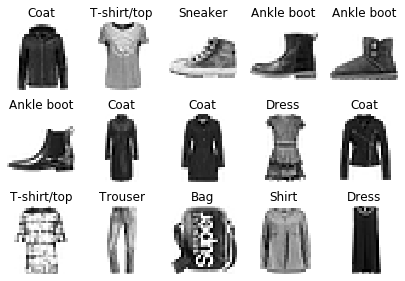

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap=plt.cm.binary)
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
show_imgs(3, 5, x_train, y_train, class_names)

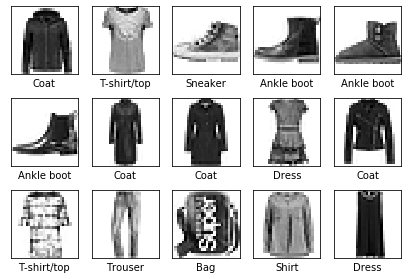

In [13]:
def show_imgs_2(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(x_data[index], cmap=plt.cm.binary)
            plt.xlabel(class_names[y_data[index]])
    plt.show()
    
show_imgs_2(3, 5, x_train, y_train, class_names)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

[None, 784] * W + b -> [None, 300]
W.shape=[784, 300], b=[300]

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 68us/sample - loss: 2.3610 - accuracy: 0.1001 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 2/10
55000/55000 [==============================] - 3s 59us/sample - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 3/10
55000/55000 [==============================] - 3s 59us/sample - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 4/10
55000/55000 [==============================] - 3s 59us/sample - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 5/10
55000/55000 [==============================] - 3s 60us/sample - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 6/10
55000/55000 [==============================] - 3s 59us/sample - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3610 - val_accuracy: 0.1002
Epoch 7/10
55000/55000 [==============================] -

做归一化

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

In [9]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 83us/sample - loss: 1.6903 - accuracy: 0.7707 - val_loss: 1.6584 - val_accuracy: 0.8026
Epoch 2/10
55000/55000 [==============================] - 4s 81us/sample - loss: 1.6519 - accuracy: 0.8086 - val_loss: 1.6381 - val_accuracy: 0.8232
Epoch 3/10
55000/55000 [==============================] - 5s 85us/sample - loss: 1.6439 - accuracy: 0.8168 - val_loss: 1.6507 - val_accuracy: 0.8096
Epoch 4/10
55000/55000 [==============================] - 4s 82us/sample - loss: 1.6367 - accuracy: 0.8240 - val_loss: 1.6330 - val_accuracy: 0.8270
Epoch 5/10
55000/55000 [==============================] - 4s 79us/sample - loss: 1.6319 - accuracy: 0.8287 - val_loss: 1.6378 - val_accuracy: 0.8232
Epoch 6/10
55000/55000 [==============================] - 4s 79us/sample - loss: 1.6344 - accuracy: 0.8263 - val_loss: 1.6360 - val_accuracy: 0.8240
Epoch 7/10
55000/55000 [==============================] -